In [1]:
!pip install wfdb

In [6]:
import wfdb

rec = wfdb.rdrecord('p00/p000020/3544749_0001',
                    sampfrom=0, sampto=50,
                    smooth_frames=False)

for (name, units, data) in zip(rec.sig_name,
                               rec.units,
                               rec.e_p_signal):
    print('{} (units {}):'.format(name, units))
    print(data)

II (units mV):
[-72. -72. -72. -72. -24. -24. -24. -24. -72. -72. -72. -72. -24. -24.
 -24. -24. -72. -72. -72. -72. -24. -24. -24. -24. -72. -72. -72. -72.
 -24. -24. -24. -24. -72. -72. -72. -72. -24. -24. -24. -24. -72. -72.
 -72. -72. -24. -24. -24. -24. -72. -72.]
AVF (units mV):
[-72. -72. -72. -72. -24. -24. -24. -24. -72. -72. -72. -72. -24. -24.
 -24. -24. -72. -72. -72. -72. -24. -24. -24. -24. -72. -72. -72. -72.
 -24. -24. -24. -24. -72. -72. -72. -72. -24. -24. -24. -24. -72. -72.
 -72. -72. -24. -24. -24. -24. -72. -72.]
ABP (units mmHg):
[-72. -72. -72. -72. -24. -24. -24. -24. -72. -72. -72. -72. -24. -24.
 -24. -24. -72. -72. -72. -72. -24. -24. -24. -24. -72. -72. -72. -72.
 -24. -24. -24. -24. -72. -72. -72. -72. -24. -24. -24. -24. -72. -72.
 -72. -72. -24. -24. -24. -24. -72. -72.]
PAP (units mmHg):
[-72. -72. -72. -72. -24. -24. -24. -24. -72. -72. -72. -72. -24. -24.
 -24. -24. -72. -72. -72. -72. -24. -24. -24. -24. -72. -72. -72. -72.
 -24. -24. -24. -24. -72. 

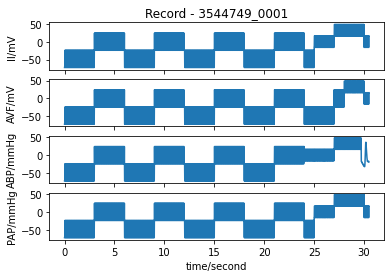

Press enter to continue... 


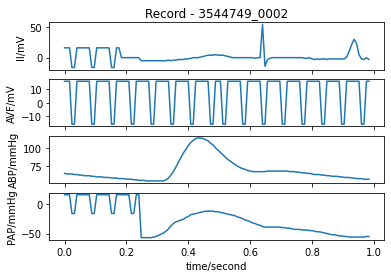

Press enter to continue... 


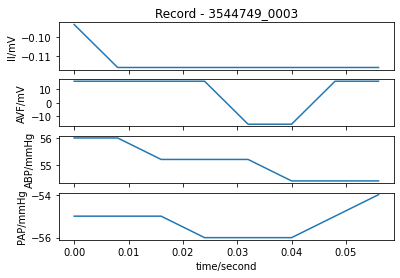

Press enter to continue... 


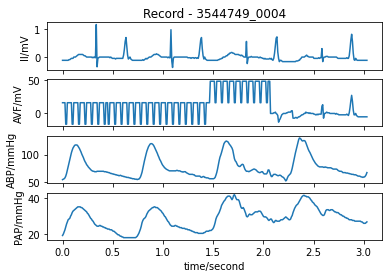

Press enter to continue... 


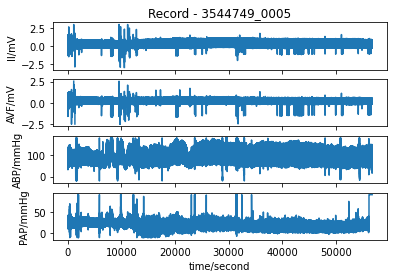

Press enter to continue... 


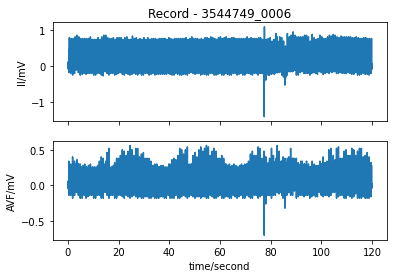

Press enter to continue... 


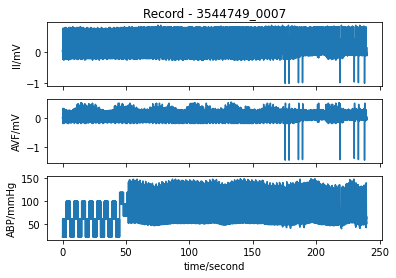

Press enter to continue... 


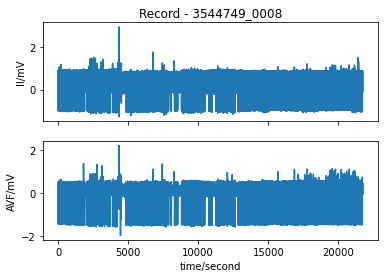

Press enter to continue... 


ValueError: sampto must be greater than sampfrom

In [13]:
root = '/home/idies/workspace/Storage/msyaile1/persistent/'
wfdb.plot.plot_all_records(directory= root+'p00/p000020/')

In [10]:
# import necessary libraries
import os
import numpy as np
import wfdb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Start with the path to the directory containing all patient folders
base_path = '/home/idies/workspace/Storage/msyaile1/persistent/'  # replace this with your base path

waveform_features = []
targets = []

# Walk through all subdirectories
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.dat'):  # assuming your waveform data is in .dat files
            file_path = os.path.join(root, file)

            # Load a waveform record
            record = wfdb.rdrecord(file_path[:-4])  # the path to the record should not include the file extension
            annotation = wfdb.rdann(file_path[:-4], 'atr')  # the path to the annotation should not include the file extension

            # Extract some basic features from the waveform, in this case mean and std deviation
            for channel in record.p_signal.T:
                mean = np.mean(channel)
                std = np.std(channel)
                waveform_features.append([mean, std])

            # Create targets for our model. This is a toy example and assumes that 
            # the length of the annotation symbol list is the same as the number of waveforms
            # In a real-world scenario, you might have to preprocess these annotations to match your waveform data
            targets.extend([1 if ann == 'N' else 0 for ann in annotation.symbol])

waveform_features = np.array(waveform_features)
targets = np.array(targets)

# First, split the data into a training set (70% of total) and a temporary set (30% of total)
X_train, X_temp, y_train, y_temp = train_test_split(waveform_features, targets, test_size=0.3, random_state=42)

# Then, split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Create and train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate on validation set
val_predictions = model.predict(X_val)
print('Validation Accuracy:', accuracy_score(y_val, val_predictions))

# Evaluate on test set
test_predictions = model.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, test_predictions))

FileNotFoundError: [Errno 2] No such file or directory: '/home/idies/workspace/Storage/msyaile1/persistent/p00/p000020/3544749_0001.atr'

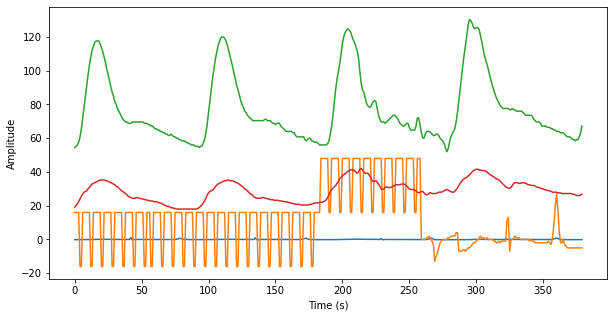

In [35]:
import wfdb
import matplotlib.pyplot as plt

# Read the record
record = wfdb.rdrecord(root+'p00/p000020/3544749_0004')

# Plot the record
plt.figure(figsize=(10,5))  # You can change the figure size to zoom in or out
plt.plot(record.p_signal)

# Set x and y axis lab|els
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Show the plot
plt.show()

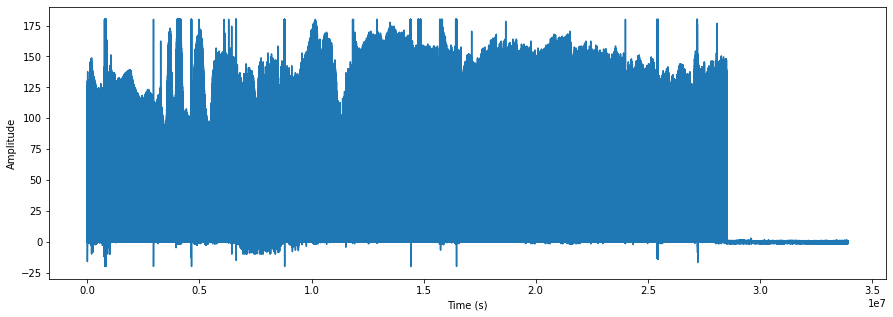

In [37]:
# Base path
base_path = root+'p00/p000020/'

# Record names
record_names = ['3544749_0004', '3544749_0005', '3544749_0006', '3544749_0007', '3544749_0008']

# Initialize an empty list to hold all signals
all_signals = []

# Loop over all record names
for record_name in record_names:
    # Read the record
    record = wfdb.rdrecord(base_path + record_name)
    
    # Append the signal to the list (assuming a single-channel signal)
    all_signals.append(record.p_signal.flatten())

# Concatenate all signals
all_signals = np.concatenate(all_signals)

# Plot the signal
plt.figure(figsize=(15,5))  # You can change the figure size to zoom in or out
plt.plot(all_signals)

# Set x and y axis labels
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Show the plot
plt.show()

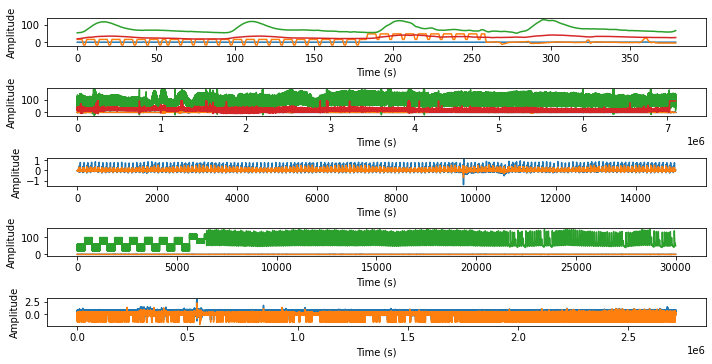

In [38]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

# Base path
base_path = root+'p00/p000020/'

# Record names
record_names = ['3544749_0004', '3544749_0005', '3544749_0006', '3544749_0007', '3544749_0008']

# Initialize an empty list to hold all signals
all_records = []

# Loop over all record names
for record_name in record_names:
    # Read the record
    record = wfdb.rdrecord(base_path + record_name)
    
    # Append the record to the list
    all_records.append(record)

# Plot each signal in a separate subplot
fig, axs = plt.subplots(len(all_records), figsize=(10,5))

for i, record in enumerate(all_records):
    # Plot the signal (assuming a single-channel signal)
    axs[i].plot(record.p_signal)
    
    # Set x and y axis labels
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Amplitude')

# Show the plot
plt.tight_layout()
plt.show()